## Introduction

In this Jupyter notebook we want to scrap the csv example on cars in the Wikipedia page and save the resulting output in the local folder 


### Load the library

In [1]:
from bs4 import BeautifulSoup
import requests

### Solution 1

Load in the html

In [3]:
csv_wiki = requests.get("https://en.wikipedia.org/wiki/Comma-separated_values")
soup = BeautifulSoup(csv_wiki.text, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Comma-separated values - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=document.cook

In [9]:
info = soup.find('table', class_ = 'wikitable').findNext('pre').text

In [10]:
soup.find('table', class_ = 'wikitable')

<table class="wikitable">
<tbody><tr>
<th>Year</th>
<th>Make</th>
<th>Model</th>
<th>Description</th>
<th>Price
</th></tr>
<tr>
<td>1997</td>
<td>Ford</td>
<td>E350</td>
<td>ac, abs, moon</td>
<td>3000.00
</td></tr>
<tr>
<td>1999</td>
<td>Chevy</td>
<td>Venture "Extended Edition"</td>
<td></td>
<td>4900.00
</td></tr>
<tr>
<td>1999</td>
<td>Chevy</td>
<td>Venture "Extended Edition, Very Large"</td>
<td></td>
<td>5000.00
</td></tr>
<tr>
<td>1996</td>
<td>Jeep</td>
<td>Grand Cherokee</td>
<td>MUST SELL!<br/>air, moon roof, loaded</td>
<td>4799.00
</td></tr></tbody></table>

In [11]:
soup.find('table', class_ = 'wikitable').findNext('pre')

<pre>Year,Make,Model,Description,Price
1997,Ford,E350,"ac, abs, moon",3000.00
1999,Chevy,"Venture ""Extended Edition""","",4900.00
1999,Chevy,"Venture ""Extended Edition, Very Large""","",5000.00
1996,Jeep,Grand Cherokee,"MUST SELL!
air, moon roof, loaded",4799.00
</pre>

In [12]:
type(info)

str

In [13]:
info

'Year,Make,Model,Description,Price\n1997,Ford,E350,"ac, abs, moon",3000.00\n1999,Chevy,"Venture ""Extended Edition""","",4900.00\n1999,Chevy,"Venture ""Extended Edition, Very Large""","",5000.00\n1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",4799.00\n'

In [14]:
f = open('car.csv', 'w')
f.write(info)
f.close()

In [19]:
## other way 
import pandas as pd
csv = soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(csv))
df = df[0]
df.to_csv('cars.csv')

In [18]:
type(pd.read_html(str(csv))[0])

pandas.core.frame.DataFrame

## Solution 2 - Get the csv example under the header "Example"

In [20]:
soup.find(id='Example').findNext('pre').text

'Year,Make,Model,Description,Price\n1997,Ford,E350,"ac, abs, moon",3000.00\n1999,Chevy,"Venture ""Extended Edition""","",4900.00\n1999,Chevy,"Venture ""Extended Edition, Very Large""","",5000.00\n1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",4799.00\n'

In [11]:
ths = soup.find(id='Example')
table = ths.findNext('pre').text
table

'Year,Make,Model,Description,Price\n1997,Ford,E350,"ac, abs, moon",3000.00\n1999,Chevy,"Venture ""Extended Edition""","",4900.00\n1999,Chevy,"Venture ""Extended Edition, Very Large""","",5000.00\n1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",4799.00\n'

In [12]:
f = open('car.csv', 'w')
f.write(table)
f.close()


## Reload the csv data from the file to make sure the data was saved properly

In [13]:

## what is the max price in the data ? min price ?

## what is the model (Make) of the most expensive car ?

## how many cars do we have per year ?

## can you give me the median, quartiles of the column Price ?


In [14]:

df = pd.read_csv('car.csv')
df

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000.0
1,1999,Chevy,"Venture ""Extended Edition""",NaN,4900.0
2,1999,Chevy,"Venture ""Extended Edition, Very Large""",NaN,5000.0
3,1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",4799.0


In [15]:
df.columns

Index(['Year', 'Make', 'Model', 'Description', 'Price'], dtype='object')

In [16]:
df['Year']

0    1997
1    1999
2    1999
3    1996
Name: Year, dtype: int64

In [17]:
df.shape

(4, 5)

In [18]:
df.dtypes

Year             int64
Make            object
Model           object
Description     object
Price          float64
dtype: object

In [19]:
df.describe()

,Year,Price
count,4.00,4.000000
mean,1997.75,4424.750000
std,1.50,953.371342
min,1996.00,3000.000000
25%,1996.75,4349.250000
50%,1998.00,4849.500000
75%,1999.00,4925.000000
max,1999.00,5000.000000


In [20]:
min(df['Price'])

3000.0

In [22]:
df.tail(2)

,Year,Make,Model,Description,Price
2,1999,Chevy,"Venture ""Extended Edition, Very Large""",NaN,5000.0
3,1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",4799.0


In [23]:
df['Year'].value_counts()

1999    2
1997    1
1996    1
Name: Year, dtype: int64

In [24]:
df.Price.max()
max(df.Price)
max(df['Price'])

5000.0

In [26]:
df.head(1)

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000.0


In [25]:
df.Price.min()
min(df.Price)

3000.0

In [23]:
df.iloc[1]

Year                                 1999
Make                                Chevy
Model          Venture "Extended Edition"
Description                           NaN
Price                              4900.0
Name: 1, dtype: object

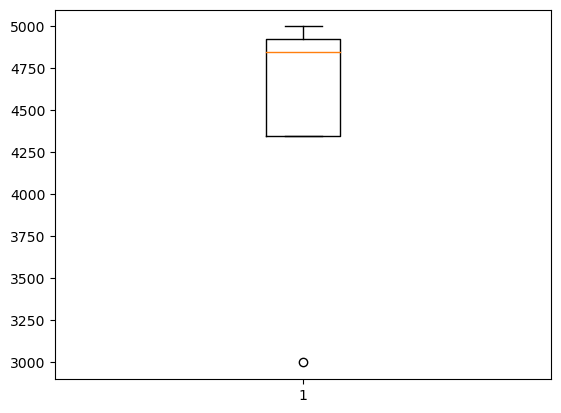

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 


fig1, ax1 = plt.subplots()
ax1.boxplot(df.Price);

In [27]:
df.loc[df.Price==max(df.Price), ]

,Year,Make,Model,Description,Price
2,1999,Chevy,"Venture ""Extended Edition, Very Large""",NaN,5000.0


In [24]:
df.Price==max(df.Price)

0    False
1    False
2     True
3    False
Name: Price, dtype: bool